# INTRODUCCIÓN

Para el presente proyecto, hemos decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que se toma la decisión de intentar atraer inversionistas. El proyecto les parece atractivo pero, ¿el negocio será capaz de mantener el éxito cuando la novedad de los camareros robot desaparezca?

Como gurús del análisis, debemos preparar un estudio de mercado. Contamos con datos procedentes de fuentes abiertas sobre restaurantes en LA.

Nos aseguraremos de que el tipo de datos para cada columna es correcto y que no hay valores ausentes o duplicados. 

# Paso 1. Descargar los datos y prepararlos para el análisis

In [1]:
#Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

Matplotlib is building the font cache; this may take a moment.


In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
rest_data.nunique()

id             9651
object_name    8672
address        8512
chain             2
object_type       6
number          216
dtype: int64

Podemos transformar la columna 'Chain' en tipo de datos categóricos y 'number' en tipo de datos float.

In [6]:
rest_data["number"] = rest_data["number"].astype("float")
rest_data["chain"] = rest_data["chain"].astype("category")
rest_data["id"] = rest_data["id"].astype("object")

In [7]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   object  
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   category
 4   object_type  9651 non-null   object  
 5   number       9651 non-null   float64 
dtypes: category(1), float64(1), object(4)
memory usage: 386.7+ KB


Eliminaremos esas 3 filas con valores ausentes en la columna 'chain', porque son muy pocas filas y exploraremos si existen duplicados.

In [8]:
rest_data = rest_data.dropna()

rest_data = rest_data.drop_duplicates()

In [9]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9648 non-null   object  
 1   object_name  9648 non-null   object  
 2   address      9648 non-null   object  
 3   chain        9648 non-null   category
 4   object_type  9648 non-null   object  
 5   number       9648 non-null   float64 
dtypes: category(1), float64(1), object(4)
memory usage: 461.8+ KB


Podemos confirmar que no tenemos filas duplicadas o más datos ausentes.

# Paso 2. Análisis de datos

## Investiguemos las proporciones de los distintos tipos de establecimientos y tracemos un gráfico.

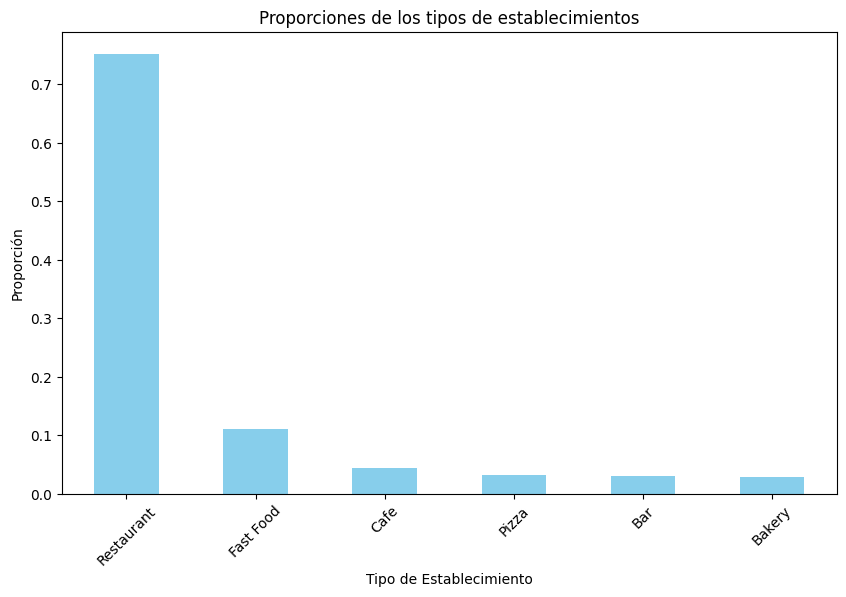

In [10]:
# Obtenemos proporciones de los tipos de establecimientos
object_type_proportions = rest_data['object_type'].value_counts(normalize=True)

# Trazamos el gráfico
plt.figure(figsize=(10, 6))
object_type_proportions.plot(kind='bar', color='skyblue')
plt.title('Proporciones de los tipos de establecimientos')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()

In [11]:
print(rest_data['object_type'].value_counts())

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64


In [12]:
object_type_proportions

Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: object_type, dtype: float64

Claramente el tipo de establecimiento con más registros son los restaurantes, con un 75%; seguido de establecimientos de comida rápida y cafés, con un 11% y 4.5% respectivamente

## Investiguemos las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Tracemos un gráfico para hacerlo visual.

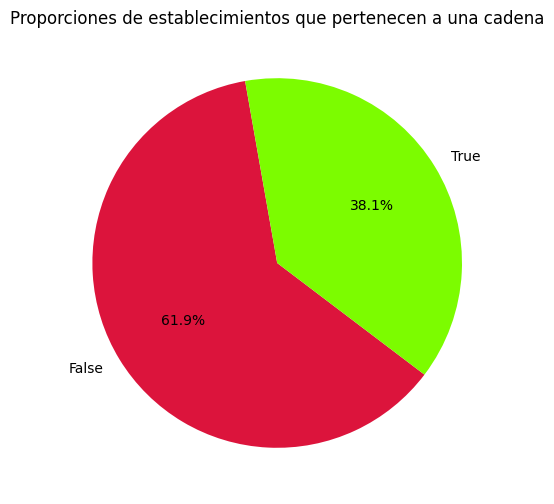

In [13]:
# Obtenemos proporciones de establecimientos que pertenecen a una cadena y los que no
chain_proportions = rest_data['chain'].value_counts(normalize=True)

# Traza un gráfico
plt.figure(figsize=(10, 6))
chain_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=100, colors=['crimson', 'lawngreen'])
plt.title('Proporciones de establecimientos que pertenecen a una cadena')
plt.ylabel('')
plt.show()


En su mayoría son establecimientos independientes.

## ¿Qué tipo de establecimiento es habitualmente una cadena?

In [14]:
# Tabla cruzada para ver qué tipo de establecimiento es habitualmente una cadena
chain_by_type = pd.crosstab(rest_data['object_type'], rest_data['chain'], normalize='index')

chain_by_type

chain,False,True
object_type,,
Bakery,0.000000,1.000000
Bar,0.736301,0.263699
Cafe,0.388506,0.611494
Fast Food,0.432458,0.567542
Pizza,0.520376,0.479624
Restaurant,0.683993,0.316007


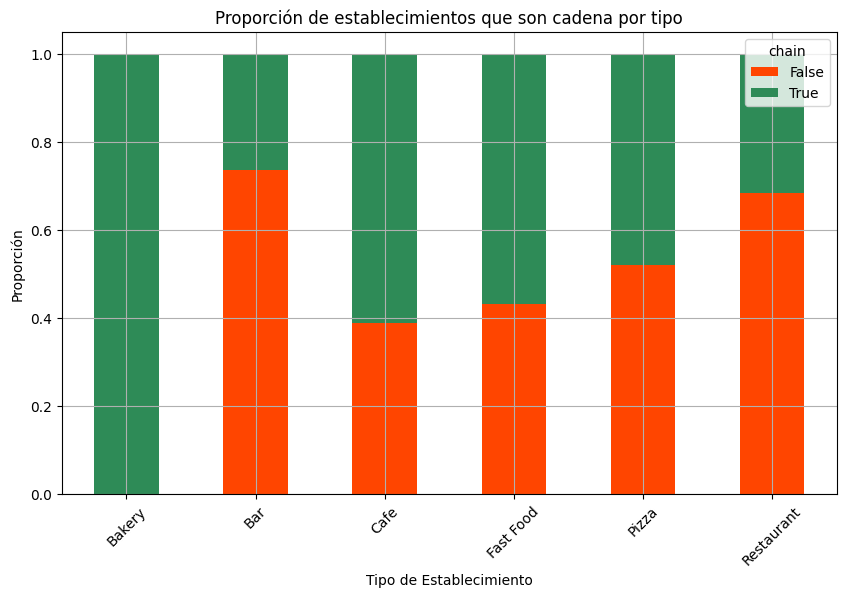

In [15]:
# Traza un gráfico
chain_by_type.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orangered', 'seagreen'], grid= True)
plt.title('Proporción de establecimientos que son cadena por tipo')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()

Observamos que el 100% de establecimientos de panadería/pastelería pertenecen al tipo de cadenas. 

Por otro lado, el tipo de establecimientos con mayor porcentaje de tipo independiente, son bares. Suena bastante lógico.


Parece ser lógico, en cuanto a pastelerías/panaderías, un negocio de este tipo que pertenezca a una cadena, genera confianza en el cliente. 

Y un bar/restaurante/café que es del tipo independiente suele tener precios accesibles y conceptos únicos, lo que puede significar una ventaja entre los clientes.

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [16]:
# Número de establecimientos por cadena y tipo
establishments_by_chain = rest_data.groupby(['chain', 'object_type'])['id'].count().reset_index()
establishments_by_chain.columns = ['chain', 'object_type', 'number_of_establishments']

In [17]:
# Promedio de asientos por tipo de establecimiento y si pertenece a una cadena
seats_by_chain = rest_data.groupby(['chain', 'object_type'])['number'].mean().reset_index()
seats_by_chain.columns = ['chain', 'object_type', 'average_seats']

In [18]:
# Combinar ambos dataframes
chain_characteristics = pd.merge(establishments_by_chain, seats_by_chain, on=['chain', 'object_type'])

In [19]:

# Echemos un vistazo al proceso 
print(establishments_by_chain)
print(seats_by_chain)

    chain object_type  number_of_establishments
0   False      Bakery                         0
1   False         Bar                       215
2   False        Cafe                       169
3   False   Fast Food                       461
4   False       Pizza                       166
5   False  Restaurant                      4961
6    True      Bakery                       283
7    True         Bar                        77
8    True        Cafe                       266
9    True   Fast Food                       605
10   True       Pizza                       153
11   True  Restaurant                      2292
    chain object_type  average_seats
0   False      Bakery            NaN
1   False         Bar      46.381395
2   False        Cafe      23.556213
3   False   Fast Food      23.633406
4   False       Pizza      31.325301
5   False  Restaurant      49.523886
6    True      Bakery      21.773852
7    True         Bar      40.259740
8    True        Cafe      25.917293
9    T

In [20]:
# Echemos un vistazo al proceso
chain_characteristics

,chain,object_type,number_of_establishments,average_seats
0,False,Bakery,0,NaN
1,False,Bar,215,46.381395
2,False,Cafe,169,23.556213
3,False,Fast Food,461,23.633406
4,False,Pizza,166,31.325301
5,False,Restaurant,4961,49.523886
6,True,Bakery,283,21.773852
7,True,Bar,77,40.259740
8,True,Cafe,266,25.917293
9,True,Fast Food,605,38.089256


In [21]:
# Separar establecimientos pertenecientes a cadenas de NO pertenecientes a cadenas
chain_characteristics_chain = chain_characteristics[chain_characteristics['chain'] == True]
chain_characteristics_no_chain = chain_characteristics[chain_characteristics['chain'] == False]

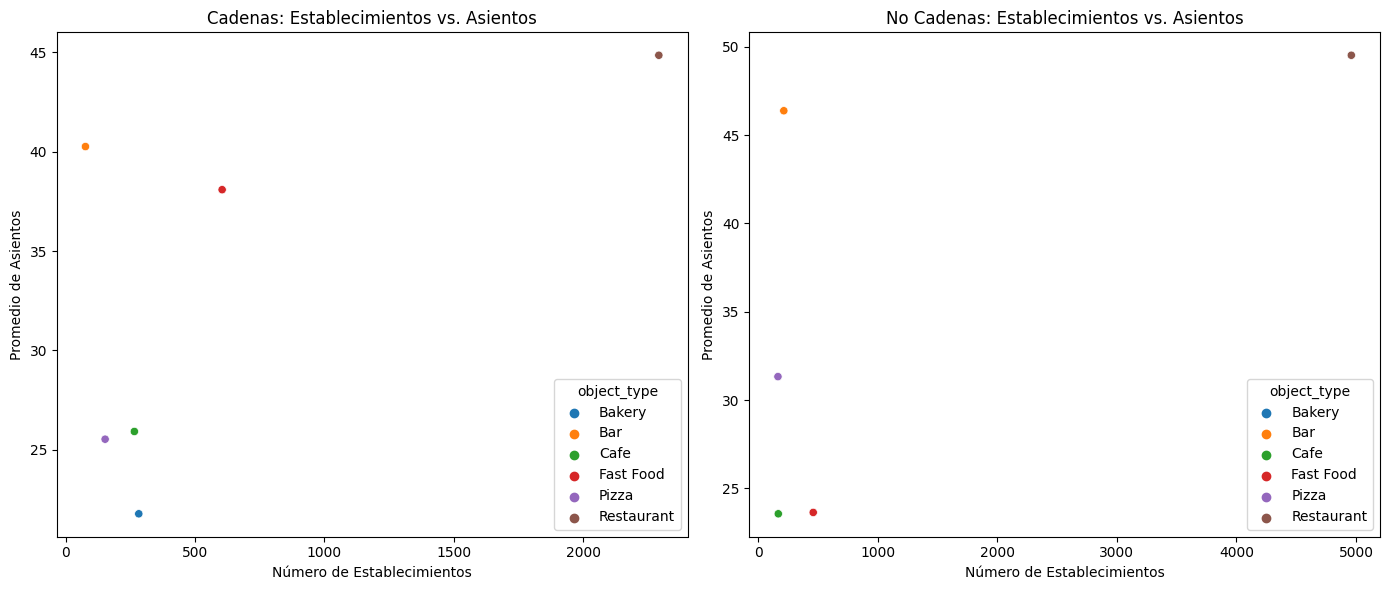

In [22]:
# Traza gráficos
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=chain_characteristics_chain, x='number_of_establishments', y='average_seats', hue='object_type')
plt.title('Cadenas: Establecimientos vs. Asientos')
plt.xlabel('Número de Establecimientos')
plt.ylabel('Promedio de Asientos')

plt.subplot(1, 2, 2)
sns.scatterplot(data=chain_characteristics_no_chain, x='number_of_establishments', y='average_seats', hue='object_type')
plt.title('No Cadenas: Establecimientos vs. Asientos')
plt.xlabel('Número de Establecimientos')
plt.ylabel('Promedio de Asientos')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Número de Asientos')

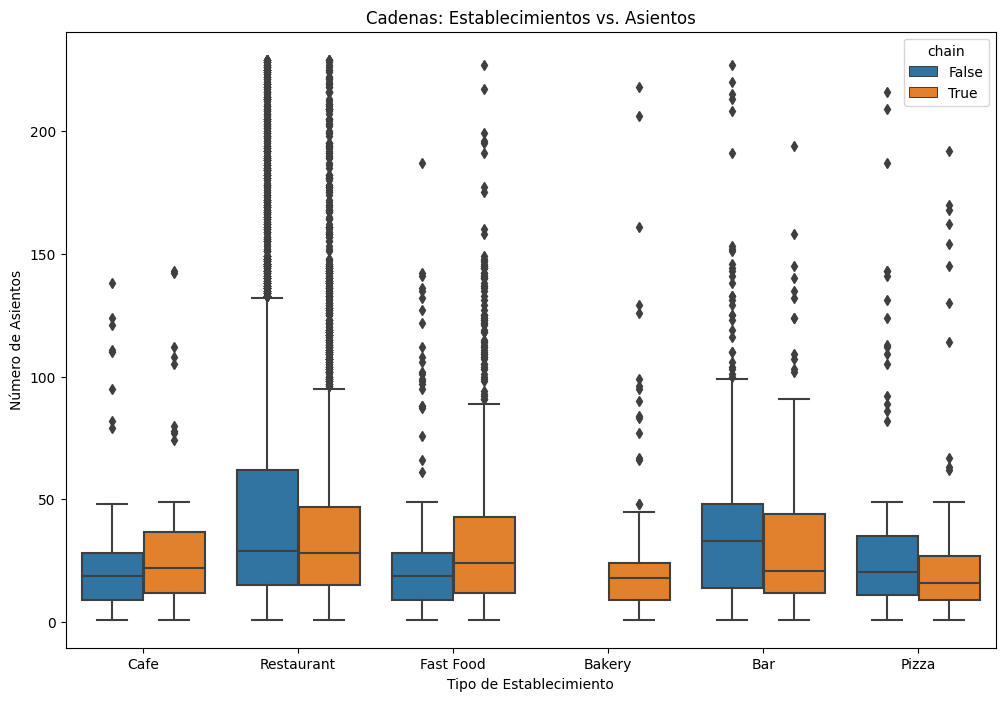

In [23]:


plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='object_type', y='number', hue='chain', data= rest_data)
plt.title('Cadenas: Establecimientos vs. Asientos')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Asientos')


Aparentemente, aquello que caracteriza a las cadenas es contar con muchos establecimientos con un pequeño número de asientos, excepto para establecimientos "Fast Food" y "Café".

## Determinaremos el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? 

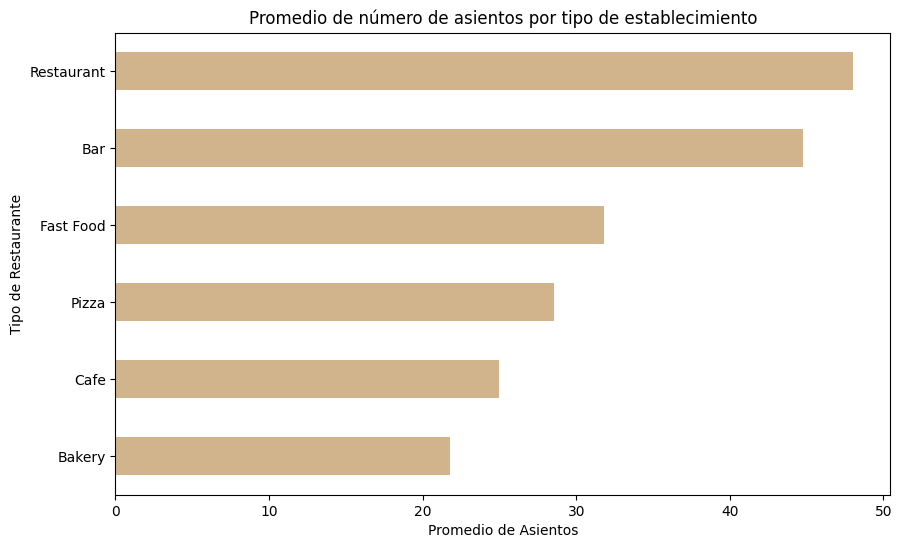

In [24]:
# Promedio de asientos por tipo de restaurante
average_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values()

# Traza un gráfico
plt.figure(figsize=(10, 6))
average_seats_by_type.plot(kind='barh', color='tan')
plt.title('Promedio de número de asientos por tipo de establecimiento')
plt.xlabel('Promedio de Asientos')
plt.ylabel('Tipo de Restaurante')
plt.show()

In [25]:
average_seats_by_type

object_type
Bakery        21.773852
Cafe          25.000000
Pizza         28.545455
Fast Food     31.837711
Bar           44.767123
Restaurant    48.048807
Name: number, dtype: float64

## Colocaremos los datos de los nombres de las calles de la columna address en una columna separada y trazaremos un gráfico de las diez mejores calles por número de restaurantes.

In [26]:
# Extraeremos nombres de las calles, eliminaremos el primer elemnto (los números de la dirección)
rest_data['street_name'] = rest_data['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Mostraremos las primeras filas del dataframe actualizado con la nueva columna "street_name"
rest_data.head(5)

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26.0,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9.0,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20.0,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22.0,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20.0,ECHO PARK AVE


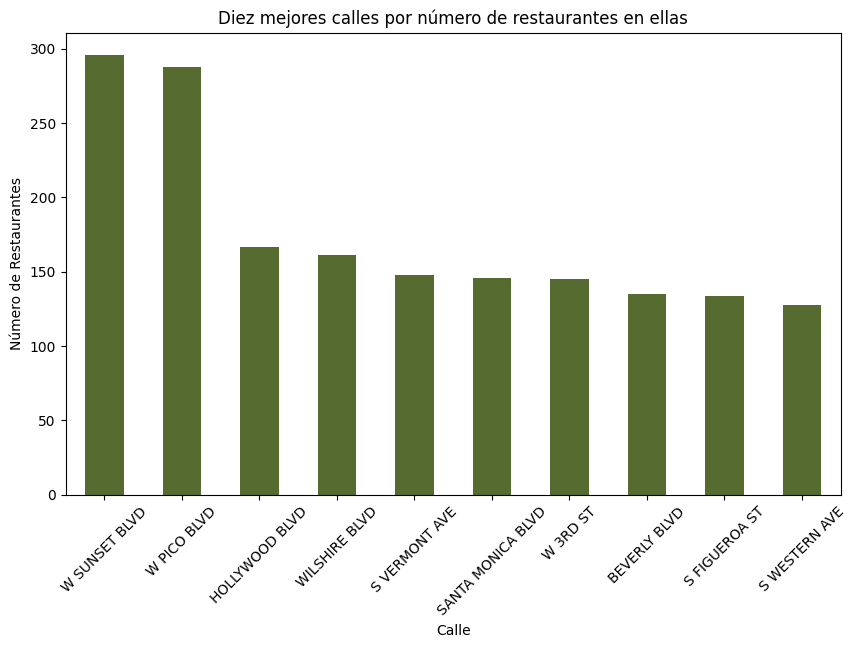

In [27]:
# Obtenemos las diez calles con más restaurantes (más recurrentes en nuestros datos)
top_ten_streets = rest_data['street_name'].value_counts().head(10)

# Trazamos un gráfico
plt.figure(figsize=(10, 6))
top_ten_streets.plot(kind='bar', color='darkolivegreen')
plt.title('Diez mejores calles por número de restaurantes en ellas')
plt.xlabel('Calle')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.show()

## Encontremos el número de calles que solo tienen un restaurante.

In [28]:
# Número de calles que solo tienen un restaurante
one_restaurant_streets = (rest_data['street_name'].value_counts() == 1).sum()
one_restaurant_streets


2445

Tenemos 2445 establecimientos que se encuentran solitarios en una calle, podríamos averiguar qué tipo de establecimientos son los que se encuentran solitarios por calle.

## Para las calles con muchos restaurantes, analizaremos la distribución del número de asientos. ¿Qué tendencias podemos ver?

In [29]:
# Filtrar solo los establecimientos que son restaurantes
restaurants_data = rest_data[rest_data['object_type'] == 'Restaurant']
restaurants_data

,id,object_name,address,chain,object_type,number,street_name
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9.0,WORLD WAY 120
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22.0,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20.0,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14.0,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100.0,WORLD WAY 126
...,...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25.0,S LOS ANGELES ST
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD 1025,False,Restaurant,225.0,SANTA MONICA BLVD 1025
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122.0,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93.0,MELROSE AVE


In [30]:
top_restaurant_streets = restaurants_data['street_name'].value_counts().reset_index()
top_restaurant_streets.columns = ['street_name', 'object_count'] 
top_restaurant_streets

,street_name,object_count
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
...,...,...
2481,JEFFERSON BLVD 2200,1
2482,BROADWAY B-5,1
2483,S ALAMEDA ST W-09,1
2484,S HILL ST ARCA 5,1


In [31]:
print(np.percentile(top_restaurant_streets['object_count'], [90, 95, 99]))

[ 3.    7.   45.15]


In [32]:
# Identificar las calles con muchos restaurantes (más de un restaurante)
streets_with_many_restaurants = restaurants_data['street_name'].value_counts()
streets_with_many_restaurants = streets_with_many_restaurants[streets_with_many_restaurants > 6]
streets_with_many_restaurants

W PICO BLVD       218
W SUNSET BLVD     217
HOLLYWOOD BLVD    136
WILSHIRE BLVD     131
W 3RD ST          119
                 ... 
E 5TH ST            7
MOTOR AVE           7
N HILL ST           7
VINE ST             7
COMPTON AVE         7
Name: street_name, Length: 137, dtype: int64

In [33]:
# Filtrar el dataset para incluir solo las calles con muchos restaurantes
many_restaurants_streets_data = restaurants_data[restaurants_data['street_name'].isin(streets_with_many_restaurants.index)]

In [34]:
many_restaurants_streets_data

,id,object_name,address,chain,object_type,number,street_name
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22.0,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20.0,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14.0,NATIONAL BLVD
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35.0,N CAHUENGA BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38.0,W SUNSET BLVD
...,...,...,...,...,...,...,...
9640,21426,POKE'ME,1244 WESTWOOD BLVD,False,Restaurant,5.0,WESTWOOD BLVD
9641,21427,OCEAN BASKETS,2851 CRENSHAW BLVD,False,Restaurant,15.0,CRENSHAW BLVD
9642,21428,TOLOSA,2635 WHITTIER BLVD,False,Restaurant,19.0,WHITTIER BLVD
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25.0,S LOS ANGELES ST


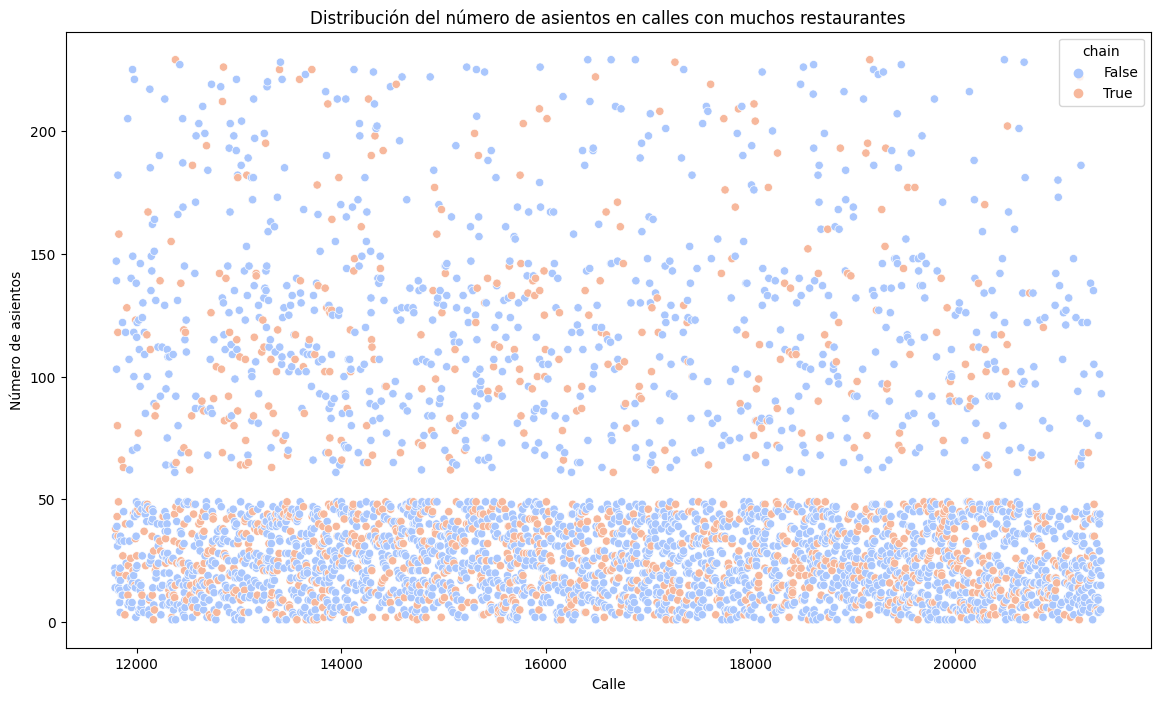

In [35]:
# Analizar la distribución del número de asientos en estas calles
plt.figure(figsize=(14, 8))
sns.scatterplot(x='id', y='number', data=many_restaurants_streets_data, palette='coolwarm', hue= 'chain')
plt.title('Distribución del número de asientos en calles con muchos restaurantes')
plt.xlabel('Calle')
plt.ylabel('Número de asientos')
plt.show()

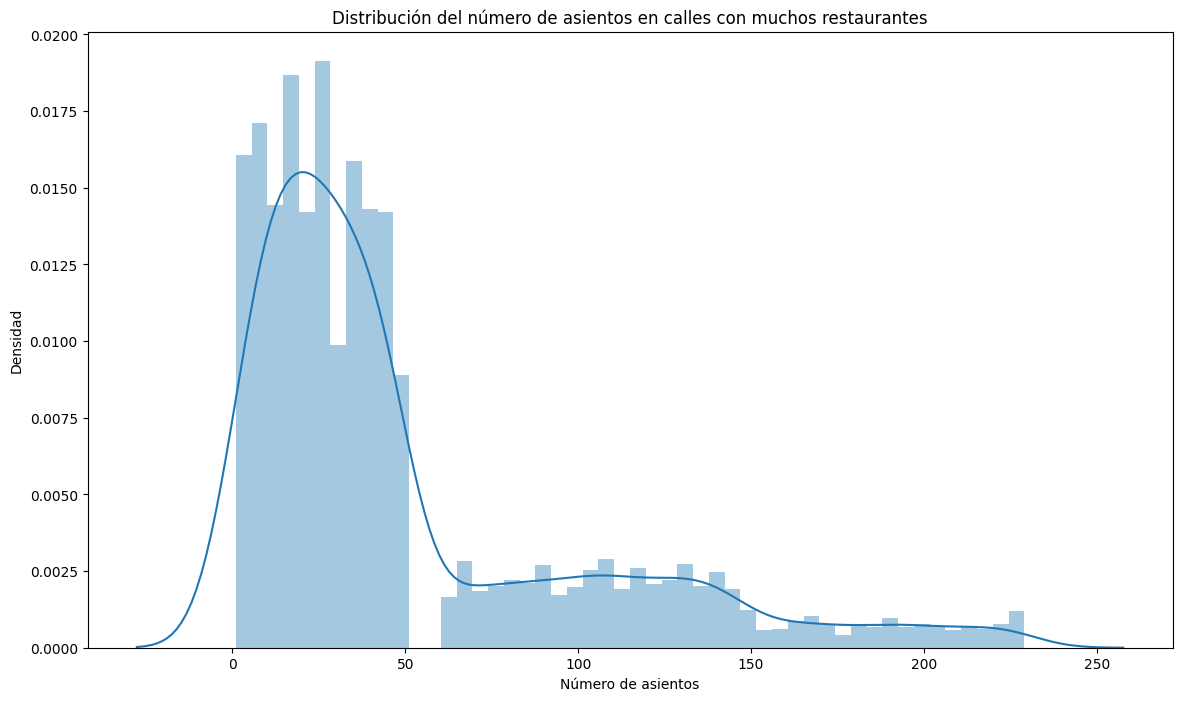

In [36]:
# Trazamos un gráfico de distribución del número de las calles con asientos de los restaurantes

plt.figure(figsize=(14, 8))
sns.distplot(many_restaurants_streets_data['number'], bins=50)
plt.title('Distribución del número de asientos en calles con muchos restaurantes')
plt.xlabel('Número de asientos')
plt.ylabel('Densidad')
plt.show()

Observamos que existe un salto en el número de asientos, como si existiese una regla no escrita sobre el límite de 50 asientos, en un restaurante y que en caso de superarse dicho límite, debe tener más de 60 asientos.

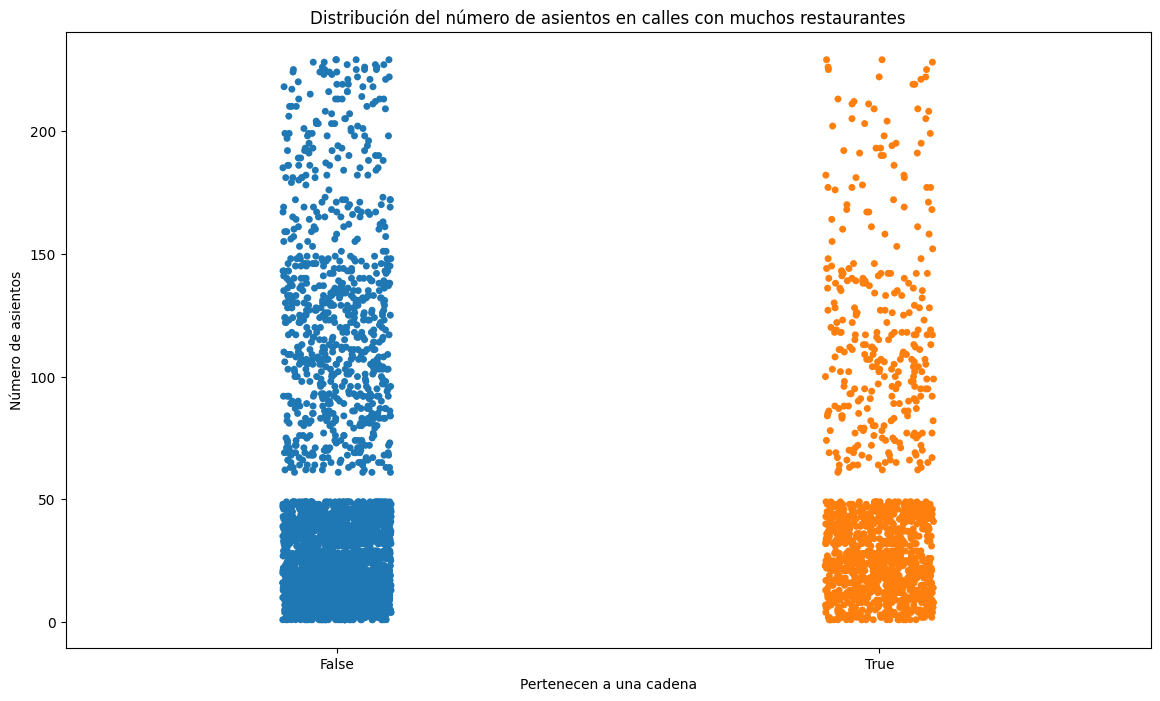

In [37]:
# Trazamos un gráfico de distribución del número de las calles con asientos de los restaurantes

plt.figure(figsize=(14, 8))
sns.stripplot(x="chain", y="number", data=many_restaurants_streets_data)
plt.title('Distribución del número de asientos en calles con muchos restaurantes')
plt.xlabel('Pertenecen a una cadena')
plt.ylabel('Número de asientos')
plt.show()



Podemos apreciar claramente que los restaurantes con menos de 50 asientos son por mucho, mayoría. Que existen más restaurantes pertenecientes a cadenas y que restaurantes establecidos de forma independiente. 

El 90 por ciento de los restaurantes cuentan con menos de 131 asientos para los establecimientos que SI pertenecen a cadenas. Mientras que el 90 por ciento de los restaurantes que NO pertenecen a una cadena cuentan con menos de 133. Es decir que las distribuciones son muy similares, visualmente se puede apreciar.

In [38]:
# Separar establecimientos pertenecientes a cadenas de NO pertenecientes a cadenas
restaurants_filtered_chain = many_restaurants_streets_data[many_restaurants_streets_data['chain'] == True]
restaurants_filtered_no_chain = many_restaurants_streets_data[many_restaurants_streets_data['chain'] == False]

In [39]:
print('Pertenecientes a cadena' , np.percentile(many_restaurants_streets_data['number'], [70, 90, 95]))
print( 'NO pertenecientes a cadena' , np.percentile(restaurants_filtered_no_chain['number'], [70, 90, 95]))


Pertenecientes a cadena [ 46. 131. 164.]
NO pertenecientes a cadena [ 47. 133. 167.]


Poco más del 70 % de los restaurantes, sin importar si pertenecen o no a una cadena, tienen menos de 50 asientos.

### Ahora lo hacemos para cafeterías

In [40]:
# Filtrar solo los establecimientos que son restaurantes
cafe_data = rest_data[rest_data['object_type'] == 'Cafe']

top_cafe_streets =cafe_data['street_name'].value_counts().reset_index()
top_cafe_streets.columns = ['street_name', 'object_count'] 

print(np.percentile(top_cafe_streets['object_count'], [90, 95, 99]))

[3.  4.  8.4]


In [41]:
# Identificar las calles con muchos restaurantes (más de un café)
streets_with_many_cafes = cafe_data['street_name'].value_counts()
streets_with_many_cafes = streets_with_many_cafes[streets_with_many_cafes > 3]

# Filtrar el dataset para incluir solo las calles con muchos restaurantes
many_cafes_streets_data = cafe_data[cafe_data['street_name'].isin(streets_with_many_cafes.index)]

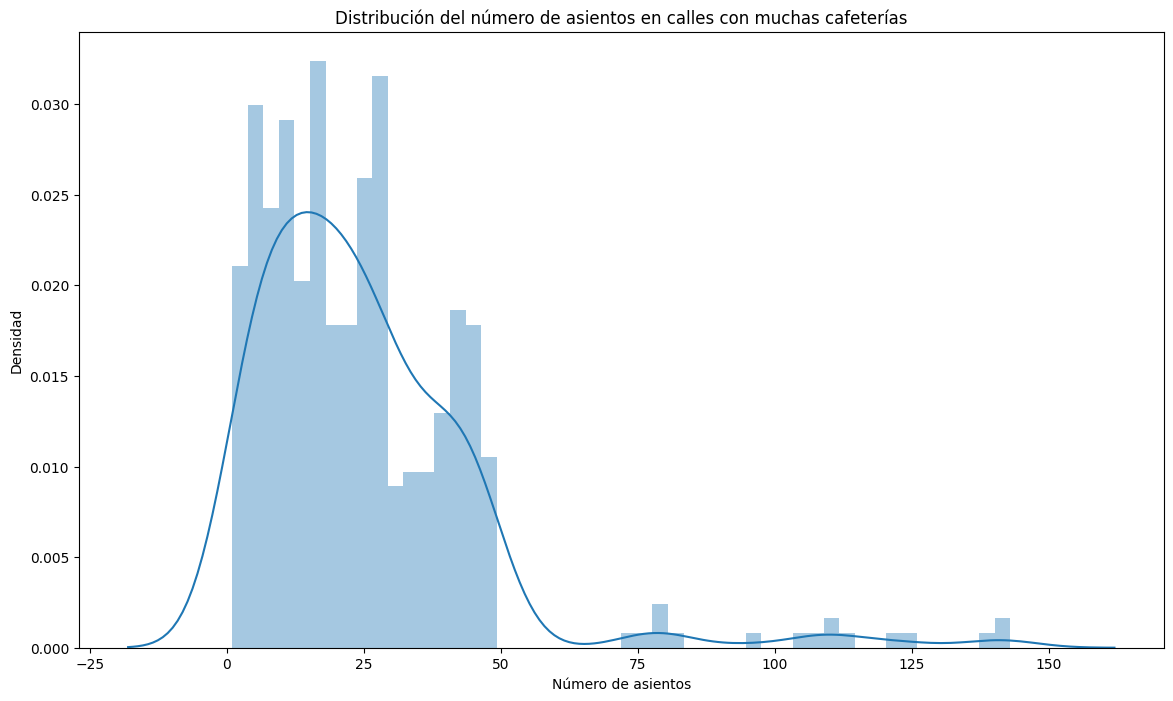

In [42]:
# Trazamos un gráfico de distribución del número de las calles con asientos de los restaurantes

plt.figure(figsize=(14, 8))
sns.distplot(cafe_data['number'], bins=50)
plt.title('Distribución del número de asientos en calles con muchas cafeterías')
plt.xlabel('Número de asientos')
plt.ylabel('Densidad')
plt.show()

### Lo hacemos nuevamente, pero esta vez para todo tipo de establecimientos

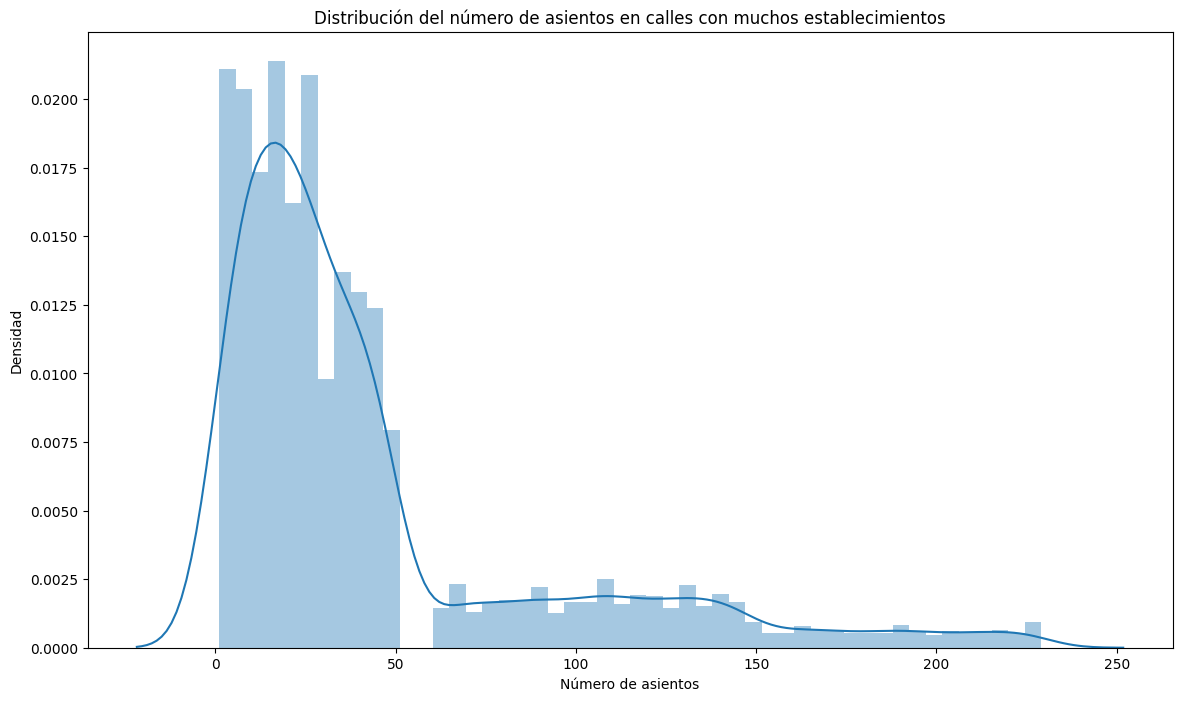

In [43]:
# Trazamos un gráfico de distribución del número de las calles con asientos de los restaurantes

plt.figure(figsize=(14, 8))
sns.distplot(rest_data['number'], bins=50)
plt.title('Distribución del número de asientos en calles con muchos establecimientos')
plt.xlabel('Número de asientos')
plt.ylabel('Densidad')
plt.show()

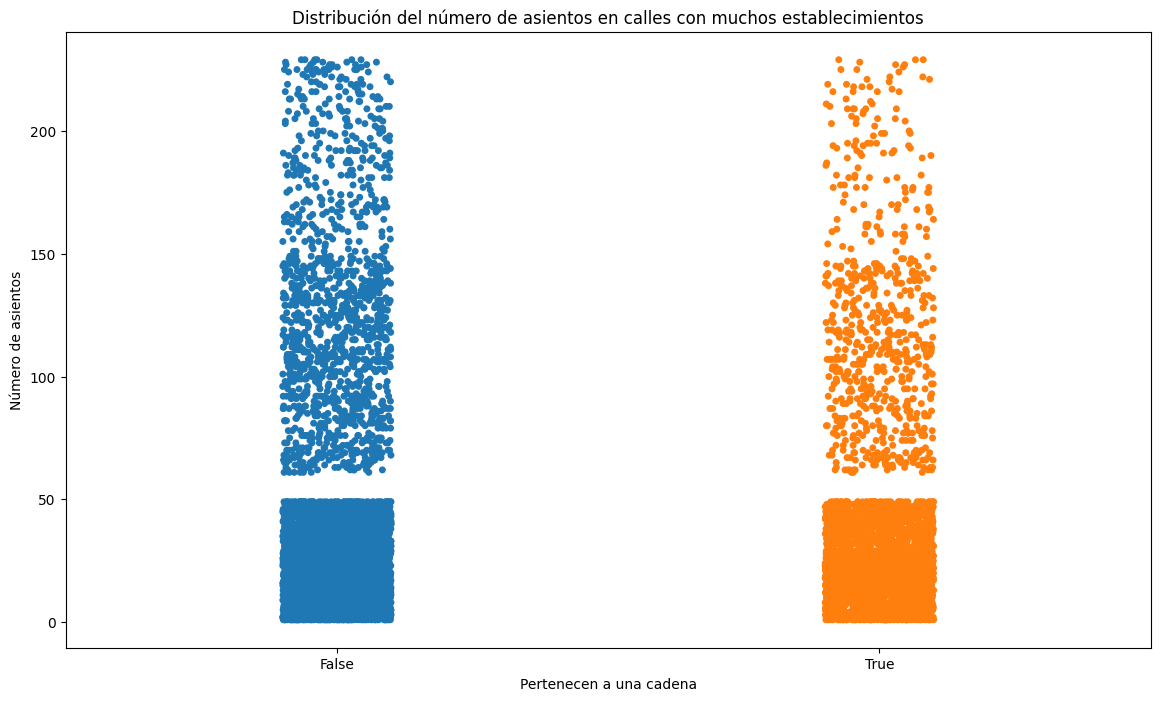

In [44]:
# Trazamos un gráfico de distribución del número de las calles con asientos de los restaurantes

plt.figure(figsize=(14, 8))
sns.stripplot(x="chain", y="number", data=rest_data)
plt.title('Distribución del número de asientos en calles con muchos establecimientos')
plt.xlabel('Pertenecen a una cadena')
plt.ylabel('Número de asientos')
plt.show()

## Agregamos conclusiones y aportamos recomendaciones sobre el tipo de restaurante y el número de asientos. Comentamos la posibilidad de desarrollar una cadena.

* **Tipo de establecimiento**

El panorama es claro: hay mucha más competencia en el mercado de los restaurantes que en otros tipos de establecimientos. 

Estaríamos compitiendo con poco más de 7200 establecimientos de restaurantes. 

En su lugar, al elegir un establecimiento de comida rápida, la competencia sería considerablemente menor.

Para una cafetería, la competencia en el mercado sería con menos de 450 cafeterías. 

En este aspecto, recomendaría una cafetería (de especialidad) o un establecimiento de comida rápida.

* **Pertenecer o no a una cadena**

Debemos tomar en consideración más factores, como por ejemplo, si será un establecimiento perteneciente a una cadena o no.

Los establecimientos pertenecientes a cadenas tienen un menor rango de personalización, y un mayor grado de "garantía", pues pueden contar desde etapas iniciales con una buena cartera de clientes.

En caso de preferir un concepto libre y original, recomendaría elegir un establecimiento que no pertenezca a una cadena de cafeterías o de comida rápida.

En este sentido se necesitarían datos sobre los ingresos para hacer un estudio más detallado. 

* **Número de Asientos**

Para el Caso de elegir una cafetería, sin importar que pertenezca o no a una cadena, se recomienda contar con entre 25 y 30 asientos. Se encuentra en nuestra base de datos como una fórmula ya comprobada.

En caso de elegir un negocio de comida rápida (Fast Food), el número de asientos recomendado sería de entre 30 y 40 asientos. 


Esta información la podemos revisar en nuestro gráfico de caja "Cadenas: Establecimientos vs. Asientos" y nuestro gráfico de líneas "Promedio de número de asientos por tipo de restaurante". Observamos que el número más bajo mencionado para ambos casos de establecimientos es el promedio, es decir, una fórmula probada con anterioridad y podríamos brindar un par de asientos extra.

* **Desarrollar una Cadena**

Para ambos tipo de establecimientos, la mayor parte de estos SI pertenecen a una cadena, solamente cerca del 40% de negocios de ambos tipos, no pertenecen a una cadena.

Debido a la sencillez de operatividad y el número de asientos que se tienen en ambos tipos de negocio (tamaño del establecimiento), pueden ser negocios repetibles y escalables. Es decir que incluso un inversionista pordría generar su propia cadena de cafeterías o de comida rápida. Se pueden estandarizar operaciones y replicar el negocio en nuevas sucursales. Es la flexibilidad que da un establecimiento de menor tamaño que un restaurante como lo son cafeterías y comida rápida.

Presentación: https://drive.google.com/file/d/1l35o8J4YukygY1J9VWWb3g1SaHXztg-F/view?usp=sharing